In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [102]:
df = pd.read_csv('./Social_Network_Ads.csv')
df=df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
269,40,61000,0
254,50,44000,0
385,56,60000,1
379,58,23000,1
235,46,79000,1


In [103]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test  = train_test_split(df.drop('Purchased',axis=1),
                                                        df['Purchased'],
                                                        test_size=0.3,
                                                        random_state=0)

X_train.shape , X_test.shape 

((280, 2), (120, 2))

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [105]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [106]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

np.round(X_train.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,38.0,69807.0
std,10.0,34641.0
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [107]:
np.round(X_train_scaled.describe())

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-2.0,-2.0
25%,-1.0,-1.0
50%,-0.0,0.0
75%,1.0,1.0
max,2.0,2.0


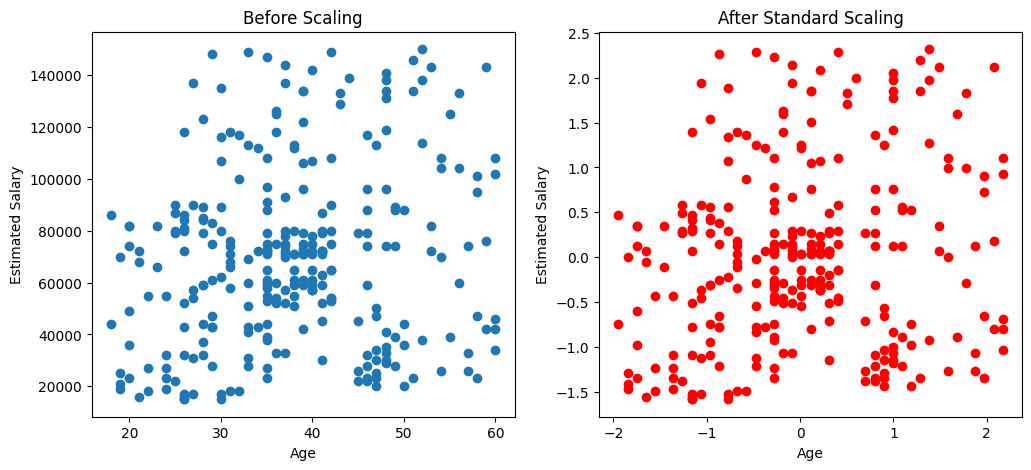

In [108]:
fig , (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set(title='Before Scaling', xlabel='Age', ylabel='Estimated Salary')
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'] , color='red')
ax2.set(title='After Standard Scaling', xlabel='Age', ylabel='Estimated Salary')
plt.show()

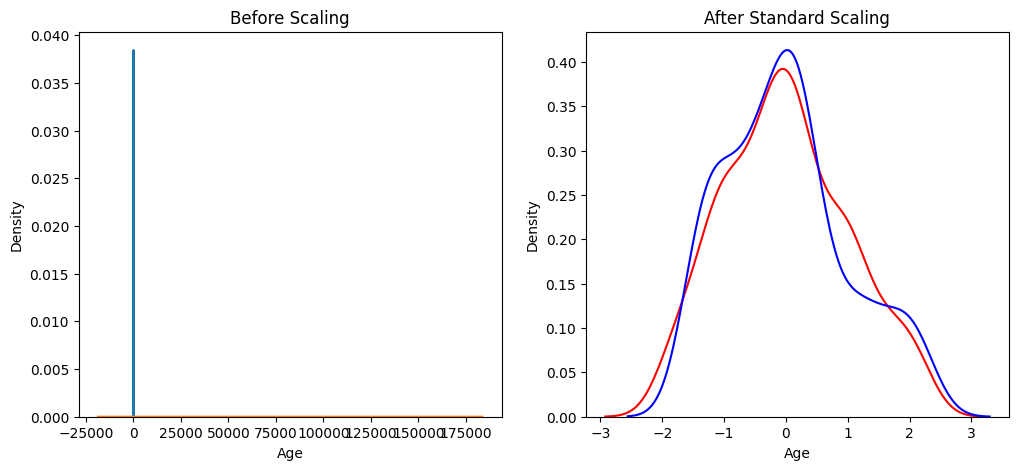

In [109]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set(xlabel='Age', title='Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)


ax2.set(xlabel='Age', title='After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2, color='red')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2, color='blue')
plt.show()


<Axes: title={'center': 'After Standard Scaling'}, xlabel='Age', ylabel='Density'>

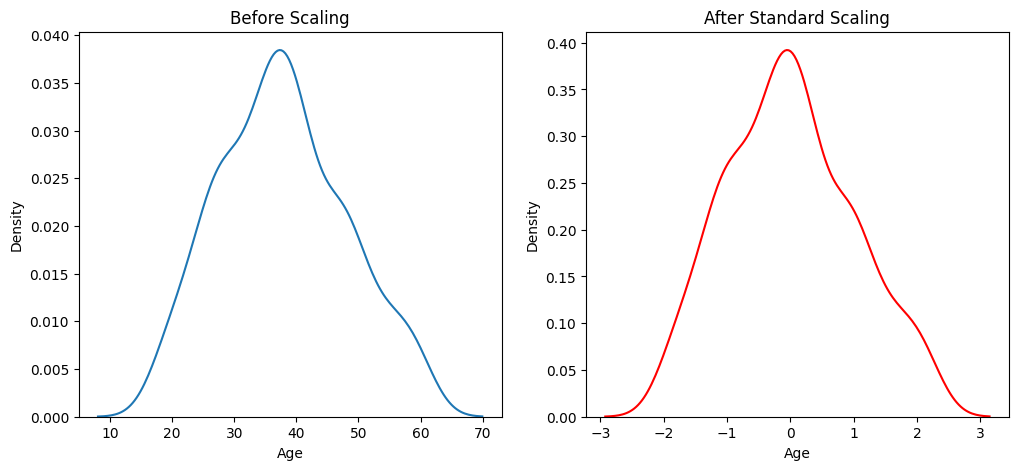

In [110]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set(xlabel='Age', title='Before Scaling')
sns.kdeplot(data=X_train['Age'], ax=ax1)

ax2.set(xlabel='Age', title='After Standard Scaling')
sns.kdeplot(data=X_train_scaled['Age'], ax=ax2, color='red')

<Axes: title={'center': 'After Standard Scaling'}, xlabel='Estimated Salary', ylabel='Density'>

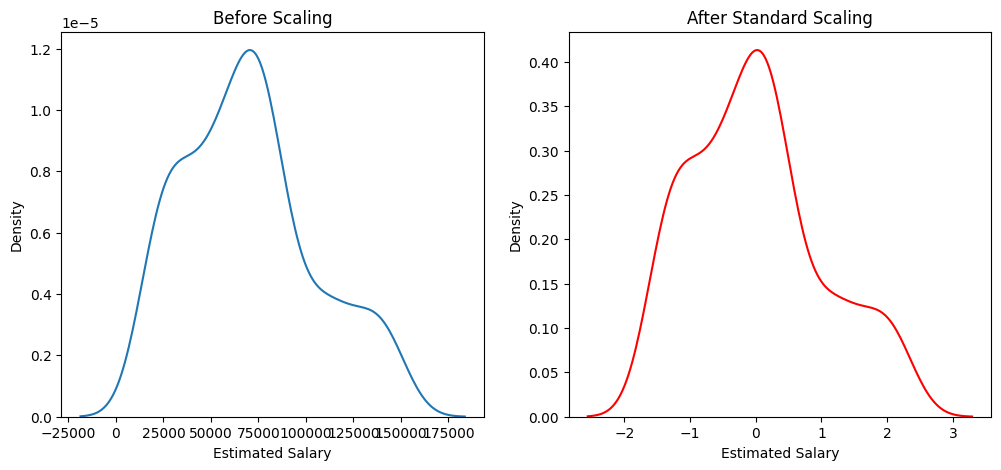

In [111]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set(xlabel='Estimated Salary', title='Before Scaling')
sns.kdeplot(data=X_train['EstimatedSalary'], ax=ax1)

ax2.set(xlabel='Estimated Salary', title='After Standard Scaling')
sns.kdeplot(data=X_train_scaled['EstimatedSalary'], ax=ax2, color='red')

In [112]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_scaled = LogisticRegression()

lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)


y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

print('Accuracy of Logistic Regression on unscaled test set: {:.3f}'.format(lr.score(X_test, y_test)))
print('Accuracy of Logistic Regression on scaled test set: {:.3f}'.format(lr_scaled.score(X_test_scaled, y_test)))

Accuracy of Logistic Regression on unscaled test set: 0.658
Accuracy of Logistic Regression on scaled test set: 0.867


In [113]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(X_train, y_train)
dt_scaled.fit(X_train_scaled, y_train)

y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

print('Accuracy of Decision Tree on unscaled test set: {:.3f}'.format(dt.score(X_test, y_test)))
print('Accuracy of Decision Tree on scaled test set: {:.3f}'.format(dt_scaled.score(X_test_scaled, y_test)))


Accuracy of Decision Tree on unscaled test set: 0.875
Accuracy of Decision Tree on scaled test set: 0.867


In [114]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000
